In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
cust_demo_data =pd.read_csv(r"C:\Users\shaik\Downloads\Datasets\Datasets\customer_demographic_data.csv")




In [13]:
cust_demo_data.tail()

,Customer ID,Age,Gender,Location,Income Level
1495,1496,20,Female,Grayville,34803
1496,1497,63,Female,Ericksonberg,20942
1497,1498,58,Male,Cannonborough,32766
1498,1499,39,Non-binary,South Courtneyland,34664
1499,1500,30,Non-binary,Hughesshire,19907


In [14]:
cust_interaction = pd.read_csv(r"C:\Users\shaik\Downloads\Datasets\Datasets\customer_interactions.csv")
sales_data = pd.read_csv(r"C:\Users\shaik\Downloads\Datasets\Datasets\sales_data.csv")

In [18]:
cust_demo_data.dtypes

Customer ID      int64
Age              int64
Gender          object
Location        object
Income Level     int64
dtype: object

In [19]:
cust_interaction.dtypes

Customer ID             int64
Interaction Date       object
Interaction Type       object
Interaction Channel    object
dtype: object

In [21]:
cust_interaction["Interaction Date"]=cust_interaction["Interaction Date"].astype("datetime64[ns]")

In [22]:
cust_interaction.dtypes

Customer ID                     int64
Interaction Date       datetime64[ns]
Interaction Type               object
Interaction Channel            object
dtype: object

In [23]:
cust_demo_data.isnull().sum()

Customer ID     0
Age             0
Gender          0
Location        0
Income Level    0
dtype: int64

In [24]:
cust_interaction.isnull().sum()

Customer ID             0
Interaction Date        0
Interaction Type        0
Interaction Channel    11
dtype: int64

In [25]:
cust_interaction["Interaction Channel"].value_counts()

Interaction Channel
website         334
email           329
social media    326
Name: count, dtype: int64

In [26]:
cust_interaction["Interaction Channel"]=cust_interaction["Interaction Channel"].fillna("website") 

In [27]:
cust_interaction.isnull().sum()

Customer ID            0
Interaction Date       0
Interaction Type       0
Interaction Channel    0
dtype: int64

In [28]:
sales_data.isnull().sum()

Transaction ID      0
Transaction Date    0
Customer ID         0
Product ID          0
Product Category    0
Sales Amount        0
Quantity            0
dtype: int64

In [29]:
sales_data.dtypes

Transaction ID        int64
Transaction Date     object
Customer ID           int64
Product ID            int64
Product Category     object
Sales Amount        float64
Quantity              int64
dtype: object

In [30]:
sales_data["Transaction Date"] = sales_data["Transaction Date"] .astype("datetime64[ns]") 

In [31]:
sales_data.dtypes

Transaction ID               int64
Transaction Date    datetime64[ns]
Customer ID                  int64
Product ID                   int64
Product Category            object
Sales Amount               float64
Quantity                     int64
dtype: object

In [34]:
cust_interaction["Customer ID"].nunique()


1000

In [35]:
total_interaction_type = (cust_interaction["Interaction Type"].value_counts()/1000)*100
total_interaction_type

Interaction Type
share    35.6
click    32.6
view     31.8
Name: count, dtype: float64

In [36]:
total_interaction_chanel= cust_interaction["Interaction Channel"].value_counts()
total_interaction_chanel

Interaction Channel
website         345
email           329
social media    326
Name: count, dtype: int64

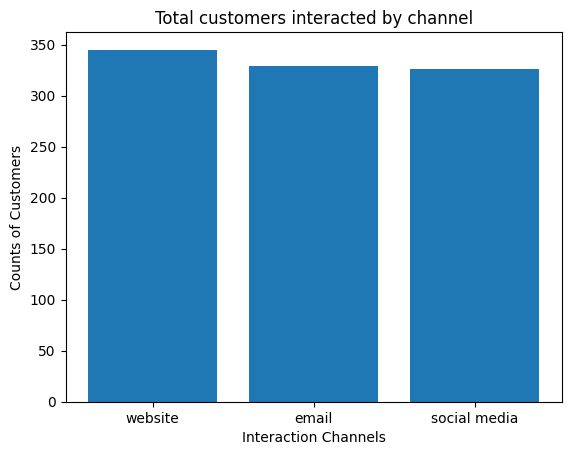

In [38]:
plt.bar(total_interaction_chanel.index, total_interaction_chanel.values)
plt.title("Total customers interacted by channel")
plt.xlabel("Interaction Channels")
plt.ylabel("Counts of Customers")
plt.show()

In [ ]:
#Engagement Rate for the Campaign
engagement_rate = (1000/1500)*100
print("Engagement rate :", round(engagement_rate, 2), "%")
Engagement rate = 66.67%

In [41]:
cust_intr_purch = cust_interaction.merge(sales_data, on = "Customer ID", how = "inner")
cust_intr_purch.head()

,Customer ID,Interaction Date,Interaction Type,Interaction Channel,Transaction ID,Transaction Date,Product ID,Product Category,Sales Amount,Quantity
0,1,2024-02-28,share,website,178,2024-05-31,88,Home & Kitchen,372.84,6
1,2,2024-04-27,view,social media,135,2024-03-18,84,Clothing,485.74,9
2,2,2024-04-27,view,social media,223,2024-07-04,99,Sports,482.55,6
3,2,2024-04-27,view,social media,886,2024-03-13,170,Home & Kitchen,272.24,9
4,2,2024-04-27,view,social media,1183,2024-02-06,241,Books,13.68,7


#What percentage of engaged customers made a purchase, and how does this compare to our targets?

In [42]:
total_cust_intr_purch = cust_intr_purch["Customer ID"].nunique()
total_cust_intr_purch

656

In [43]:
purch_rate_targeted = (total_cust_intr_purch / 1500) * 100
purch_rate_engaged = (total_cust_intr_purch / 1000) * 100

print("Purchase rate by targeted customers :", round(purch_rate_targeted, 2), "%")
print("Purchase rate by engaged customers :", round(purch_rate_engaged, 2), "%")

Purchase rate by targeted customers : 43.73 %
Purchase rate by engaged customers : 65.6 %


In [44]:
sales_data.head()

,Transaction ID,Transaction Date,Customer ID,Product ID,Product Category,Sales Amount,Quantity
0,1,2024-01-19,213,345,Books,295.15,7
1,2,2024-06-11,59,134,Electronics,457.78,1
2,3,2024-01-10,178,89,Electronics,423.84,2
3,4,2024-05-30,359,423,Home & Kitchen,497.52,1
4,5,2024-03-21,384,139,Clothing,164.21,7


What was the overall impact on sales? Did we see a significant increase in sales during and after the campaign period?
Total sales during the campaign

In [47]:
sales_data["Transaction Date"].min()

Timestamp('2024-01-01 00:00:00')

In [48]:
sales_data["Transaction Date"].max()

Timestamp('2024-07-06 00:00:00')

In [49]:
sales_data["Sales"] = sales_data["Sales Amount"] * sales_data["Quantity"]
sales_data.head()

,Transaction ID,Transaction Date,Customer ID,Product ID,Product Category,Sales Amount,Quantity,Sales
0,1,2024-01-19,213,345,Books,295.15,7,2066.05
1,2,2024-06-11,59,134,Electronics,457.78,1,457.78
2,3,2024-01-10,178,89,Electronics,423.84,2,847.68
3,4,2024-05-30,359,423,Home & Kitchen,497.52,1,497.52
4,5,2024-03-21,384,139,Clothing,164.21,7,1149.47


In [50]:
sales_data["Month"] = sales_data["Transaction Date"].dt.month
sales_data["Day"] = sales_data["Transaction Date"].dt.day
sales_data.head()

,Transaction ID,Transaction Date,Customer ID,Product ID,Product Category,Sales Amount,Quantity,Sales,Month,Day
0,1,2024-01-19,213,345,Books,295.15,7,2066.05,1,19
1,2,2024-06-11,59,134,Electronics,457.78,1,457.78,6,11
2,3,2024-01-10,178,89,Electronics,423.84,2,847.68,1,10
3,4,2024-05-30,359,423,Home & Kitchen,497.52,1,497.52,5,30
4,5,2024-03-21,384,139,Clothing,164.21,7,1149.47,3,21


In [53]:
sales_campaign = sales_data[sales_data["Month"]<5]["Sales"]
sales_campaign

0       2066.05
2        847.68
4       1149.47
5       2875.20
6        977.55
         ...   
1362     378.48
1364     440.93
1365    2882.76
1366     286.68
1369    1762.14
Name: Sales, Length: 918, dtype: float64

In [60]:
total_sales_campaign = sum(sales_campaign)
print("Total sales during campaign :", total_sales_campaign)

Total sales during campaign : 1308551.48


In [62]:
sale_after_campaign = sales_data[sales_data["Month"]>4]["Sales"]
sale_after_campaign

1        457.78
3        497.52
9       1014.58
10       659.16
15      4341.80
         ...   
1360    1022.36
1361    3395.34
1363    2393.30
1367     481.28
1368    1094.80
Name: Sales, Length: 452, dtype: float64

In [63]:
total_sales_after_campaign = sum(sale_after_campaign)
print("total sales after campaign :",total_sales_after_campaign)

total sales after campaign : 637323.82


In [64]:
#Increase/decrease rate of sales
sales_incr_rate = ((total_sales_campaign - total_sales_after_campaign) / total_sales_after_campaign) * 100
print("Sales increase rate :", round(sales_incr_rate, 2), "%")

Sales increase rate : 105.32 %


How does the ROI of this campaign compare to previous ones? Was our spending justified by the results?
ROI of recent campaign.

In [2]:
roi_recent_camp = ((1308551.48 - 50000) / 50000) * 100
print("ROI of recent campaign :", round(roi_recent_camp, 2))

ROI of recent campaign : 2517.1


ROI of previous campaign

In [3]:
roi_previous_camp = ((268009 - 57000) / 57000) * 100
print("ROI of previous campaign :", round(roi_previous_camp, 2))

ROI of previous campaign : 370.19


In [4]:
roi_growth = ((roi_recent_camp - roi_previous_camp) / roi_previous_camp) *100
print("ROI growth rate :", round(roi_growth, 2), "%")

ROI growth rate : 579.95 %


Which customer demographics responded most positively or negatively to the campaign? Are there specific segments we should focus on or avoid in the future?

In [22]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [23]:
 cust_demo_data =pd.read_csv(r"C:\Users\shaik\Downloads\Datasets\Datasets\customer_demographic_data.csv")
cust_interaction = pd.read_csv(r"C:\Users\shaik\Downloads\Datasets\Datasets\customer_interactions.csv")


In [41]:
cust_demo_data.head()
cust_interaction["Interaction Channel"]=cust_interaction["Interaction Channel"].fillna("website") 

In [42]:
interacted_cust_data = cust_demo_data.merge(cust_interaction,on = "Customer ID",how = "inner")
interacted_cust_data.head()

,Customer ID,Age,Gender,Location,Income Level,Interaction Date,Interaction Type,Interaction Channel
0,1,65,Male,Martinezmouth,61083,2/28/2024,share,website
1,2,43,Non-binary,South Anne,90419,4/27/2024,view,social media
2,3,58,Non-binary,West Darrellport,38260,2/26/2024,share,email
3,4,53,Non-binary,Stevenshire,34649,2/13/2024,click,email
4,5,69,Female,South Kellychester,70420,4/1/2024,share,social media


In [43]:
young_low_income_intr =interacted_cust_data[(interacted_cust_data["Age"]>17) & (interacted_cust_data["Age"] <25) & (interacted_cust_data["Income Level"] <30000)]
young_low_income_intr.head()

,Customer ID,Age,Gender,Location,Income Level,Interaction Date,Interaction Type,Interaction Channel
51,52,20,Other,Dianaton,19176,5/4/2024,view,social media
64,65,21,Male,Lukemouth,26780,1/18/2024,click,social media
92,93,20,Other,Port Marvin,23532,3/11/2024,view,social media
114,115,20,Female,Lake Robertfurt,14709,2/6/2024,share,website
138,139,23,Non-binary,Cherylburgh,19490,4/5/2024,view,email


In [52]:
young_medium_income_intr = interacted_cust_data[(interacted_cust_data["Age"] > 17) & (interacted_cust_data["Age"] < 25) & (interacted_cust_data["Income Level"] > 30000) & (interacted_cust_data["Income Level"] < 75000)]
young_medium_income_intr.head()

,Customer ID,Age,Gender,Location,Income Level,Interaction Date,Interaction Type,Interaction Channel
8,9,24,Non-binary,East Melanie,43329,4/8/2024,click,email
12,13,23,Non-binary,Port Vincent,46646,2/1/2024,share,social media
20,21,19,Non-binary,Paceview,53522,4/27/2024,share,website
72,73,22,Non-binary,Sherriton,55401,2/5/2024,click,social media
82,83,19,Female,Gibbsstad,44655,3/2/2024,click,email


In [53]:
middle_high_income_intr = interacted_cust_data[(interacted_cust_data["Age"] > 24) & (interacted_cust_data["Income Level"] > 75000)]
middle_high_income_intr.head()

,Customer ID,Age,Gender,Location,Income Level,Interaction Date,Interaction Type,Interaction Channel
1,2,43,Non-binary,South Anne,90419,4/27/2024,view,social media
6,7,43,Male,Lake Joseph,89845,3/3/2024,click,website
9,10,37,Non-binary,Port Andrew,81745,5/1/2024,share,email
16,17,66,Other,East Jessica,95692,4/16/2024,click,email
19,20,41,Male,North David,77251,3/11/2024,click,website


In [54]:
young_low_income_intr_cust = young_low_income_intr["Customer ID"].nunique()
egr_young_low_income_intr_cust = (young_low_income_intr_cust / 1000) * 100
round(egr_young_low_income_intr_cust, 2)


2.9

In [55]:
young_medium_income_intr_cust = young_medium_income_intr["Customer ID"].nunique()
egr_young_medium_income_intr_cust = (young_medium_income_intr_cust / 1000) * 100
round(egr_young_medium_income_intr_cust, 2)

7.7

In [56]:
middle_high_income_intr_cust = middle_high_income_intr["Customer ID"].nunique()
egr_middle_high_income_intr_cust = (middle_high_income_intr_cust / 1000) * 100
round(egr_middle_high_income_intr_cust, 2)

22.8

Final Remarks
Most of the customers interacted by sharing our posts and exploring our websites with a customer engagement rate of 66.67%.
We have exceeded our target conversion rate of 35% by the conversion rate of this marketing campaign based on the number of total targeted customers (43.73%).
We have achieved a huge milestone of 105% sales increase and 580% ROI growth in this marketing campaign compared to previous marketing campaign.
Middle aged higher income customers responded most positively with around 22% engagement and conversion rate compared to other customer demographic segments. We should specially focus on the customers of this segment.
Thank You!